# Data Cleaning and Modelling

#### Lets say we are given a dataset and an interviewer says "Tell me what you can find out!". Before we can build any model, we must make sure the data is clean first.

We shall try to build a model to predict whether or not an appointment will be requested

In [40]:
# Data Modelling and Cleaning excersieze

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline




In [57]:
df = pd.read_csv('data/Patient-Acquisition-Data4.csv')
df.head()

,source,campaign,region,locality,preferred_doctor_gender,reason_for_visit,patient_insured,number_of_match_results,out_network_results_shown,in_network_results_shown,avg_distance_overall,appointment_requested
0,facebook,san_diego_doctor_patient_acquisition,San Jose,San Jose,No Pref,Specific Treatment,f,9,0,0,10547.219510,f
1,facebook,san_diego_doctor_patient_acquisition,San Diego,Chula Vista,F,Checkup,f,2,0,0,20784.617720,f
2,try.healthcare.com,Unknown,Austin,Austin,No Pref,Checkup,t,9,8,1,8014.945931,t
3,facebook,denver_doctor_patient_acquisition,Denver,Golden,No Pref,Specific Treatment,t,8,2,6,16651.158750,f
4,facebook,chicago_doctor_patient_acquisition,Chicago,Chicago,F,Checkup,f,9,0,0,5216.934559,f


In [58]:
#Lets look at the data
df.shape #dont use parentheses

(17503, 12)

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17503 entries, 0 to 17502
Data columns (total 12 columns):
source                       17477 non-null object
campaign                     17491 non-null object
region                       17503 non-null object
locality                     17503 non-null object
preferred_doctor_gender      17503 non-null object
reason_for_visit             17493 non-null object
patient_insured              17503 non-null object
number_of_match_results      17503 non-null int64
out_network_results_shown    17503 non-null int64
in_network_results_shown     17503 non-null int64
avg_distance_overall         16933 non-null float64
appointment_requested        17503 non-null object
dtypes: float64(1), int64(3), object(8)
memory usage: 1.6+ MB


In [60]:
#%%timeit #if we want to time the function

#check for duplicate columns
df.T.duplicated()

source                       False
campaign                     False
region                       False
locality                     False
preferred_doctor_gender      False
reason_for_visit             False
patient_insured              False
number_of_match_results      False
out_network_results_shown    False
in_network_results_shown     False
avg_distance_overall         False
appointment_requested        False
dtype: bool

In [61]:
#test to see how duplicated function works on columns
df['source2'] = df['source']
df.T.duplicated()

#we see that the duplicated column shows up as TRUE while the orignal does not!

source                       False
campaign                     False
region                       False
locality                     False
preferred_doctor_gender      False
reason_for_visit             False
patient_insured              False
number_of_match_results      False
out_network_results_shown    False
in_network_results_shown     False
avg_distance_overall         False
appointment_requested        False
source2                       True
dtype: bool

In [62]:
#Remove columns from above test
df.drop('source2', inplace=True, axis=1)
df.head()

,source,campaign,region,locality,preferred_doctor_gender,reason_for_visit,patient_insured,number_of_match_results,out_network_results_shown,in_network_results_shown,avg_distance_overall,appointment_requested
0,facebook,san_diego_doctor_patient_acquisition,San Jose,San Jose,No Pref,Specific Treatment,f,9,0,0,10547.219510,f
1,facebook,san_diego_doctor_patient_acquisition,San Diego,Chula Vista,F,Checkup,f,2,0,0,20784.617720,f
2,try.healthcare.com,Unknown,Austin,Austin,No Pref,Checkup,t,9,8,1,8014.945931,t
3,facebook,denver_doctor_patient_acquisition,Denver,Golden,No Pref,Specific Treatment,t,8,2,6,16651.158750,f
4,facebook,chicago_doctor_patient_acquisition,Chicago,Chicago,F,Checkup,f,9,0,0,5216.934559,f


Now check for duplicated rows - we have 696 duplicated rows

In [63]:
# Now check for duplicated rows - we have 696 entirely duplicated rows
print(df.duplicated().sum())
print(df.shape)

696
(17503, 12)


We drop this data (these 696 rows) since they are entirely duplicative in the dataset.

In [64]:
df.drop_duplicates(inplace=True)
df.shape

(16807, 12)

Now lets look at NaNs

In [65]:
df.isna().sum()

source                        26
campaign                      12
region                         0
locality                       0
preferred_doctor_gender        0
reason_for_visit              10
patient_insured                0
number_of_match_results        0
out_network_results_shown      0
in_network_results_shown       0
avg_distance_overall         504
appointment_requested          0
dtype: int64

Lets explore the data column-by-coumn, assess its quality and make decisions along the way

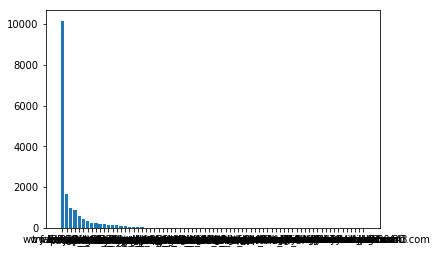

facebook                         10160
adwords                           1674
Patients                           961
www.healthcare.com                 861
try.healthcare.com                 600
Branded - SEO                      424
Direct                             340
growsumo                           247
SEO - C/S Page                     243
drip_gift_card_4                   183
Branded - Adwords                  173
patient_leads_jun_2018             158
jan_2018_high_offer                140
www.facebook.com                   134
m.facebook.com                     110
lm.facebook.com                     74
l.facebook.com                      51
patient_leads_may_2018              36
may_long_weekend                    32
cancellation                        25
instagram.com                       18
www.healthcare.com:443              10
www.google.com                       9
noshow                               8
drip_no_card_4                       8
gmail                    

In [66]:
#first the Source column. Since its a series, we can use the value_counts() func
plt.figure()
plt.bar(df['source'].value_counts().index, df['source'].value_counts().values)
plt.show()


display(df['source'].value_counts())

We see that there are many different entries in the 'source' column t be useful. We will label NaNs, and all entries not labelled as 'Facebook', 'adwords', 'Patients', or 'Direct' as 'Other'. All entries of 'Facebook' or variants will be labelled collectively as 'Facebook' for consistency.

If there was additional time, I would consult with the Marketing Department to discuss if this strategy is the best approach and get any additonal information on what other sources may be valuable to keep. 


In [67]:
#Facebook fix

#first get rid of NaNs OR classify them as 'Facebook' since most entries are facebook, OR lavel them as 'Other' since we dont know
df['source'].fillna('Other', inplace=True)

#as a note, this is case-sensitive. This will look at any row in the df where the source column contains 'facebook', and replace that cell
#MAKE SURE THERE ARE NO NANs
df.loc[df['source'].str.contains('facebook'), 'source'] = 'Facebook'

#now re-label anything thats not 'Facebook', 'adwords', 'Patients', or 'Direct' as 'Other'
other_cols = ['Facebook', 'adwords','Patients', 'Direct','Other']
df.loc[~df['source'].isin(other_cols), 'source'] = 'Other'


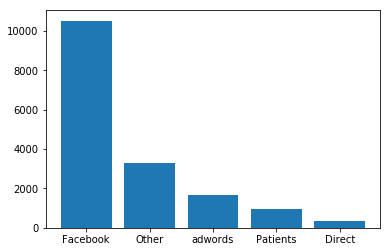

In [68]:
#now lets plot again and see
plt.figure()
plt.bar(df['source'].value_counts().index, df['source'].value_counts().values)
plt.show()

Now this plot looks much better!

Now lets look at another column - Campaign

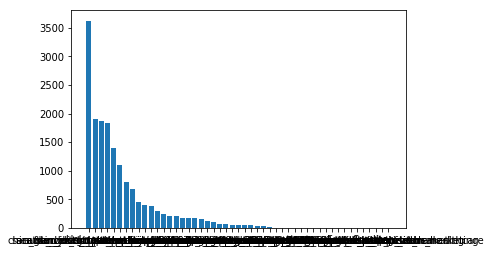

Unknown                                          3624
chicago_doctor_patient_acquisition               1910
seattle_doctor_patient_acquisition               1875
austin_doctor_patient_acquisition                1840
san_francisco_doctor_patient_acquisition         1397
denver_doctor_patient_acquisition                1102
san_jose_doctor_patient_acquisition               808
san_diego_doctor_patient_acquisition              684
search_chicago_local                              450
doctor_patient_acquisition                        409
patient_leads_jun_2018                            390
search_seattle_metro                              294
search_austin_local                               241
search_sanfrancisco_metro                         202
branded_keywords                                  202
search_seattle_local                              181
jan_2018_high_offer                               177
search_sanfrancisco_local                         176
search_chicago_metro        

In [69]:
plt.figure()
plt.bar(df['campaign'].value_counts().index, df['campaign'].value_counts().values)
plt.show()


display(df['campaign'].value_counts())

In [70]:
# We'll bucket any NaN as Unknown
df['campaign'].fillna('Unknown', inplace=True)


# We'll bucket all entries containing 'doctor_patient_aquisition' together
df.loc[df['campaign'].str.contains('doctor_patient_acquisition'), 'campaign'] = 'doctor_patient_acquisition'


# We'll bucket all entries containing 'search' together 
df.loc[df['campaign'].str.contains('search'), 'campaign'] = 'search'


# We'll bucket all entries containing 'patient_leads' toegther
df.loc[df['campaign'].str.contains('patient_leads'), 'campaign'] = 'patient_leads'


# We'll bucket all remaining entries as 'Other'
labels_to_keep = ['Unknown', 'doctor_patient_acquisition', 'search', 'patient_leads']
df.loc[~df['campaign'].isin(labels_to_keep), 'campaign'] = 'Other'


View this column as a bar plot

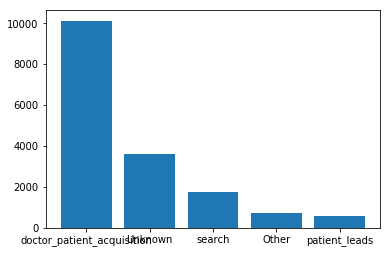

In [71]:
plt.figure()
plt.bar(df['campaign'].value_counts().index, df['campaign'].value_counts().values)
plt.show()

Lets look at Region

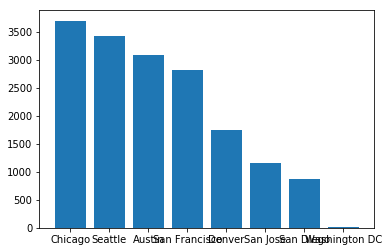

Chicago          3694
Seattle          3424
Austin           3074
San Francisco    2821
Denver           1753
San Jose         1151
San Diego         876
Washington DC      14
Name: region, dtype: int64

In [73]:
plt.figure()
plt.bar(df['region'].value_counts().index, df['region'].value_counts().values)
plt.show()

display(df['region'].value_counts())

The region column look okay, lets look at the next one 'locality'

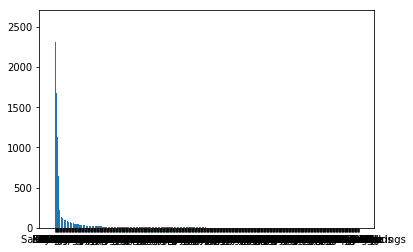

Chicago              2576
Austin               2310
San Francisco        1927
Seattle              1675
Denver               1127
San Jose              756
San Diego             645
Oakland               243
Bellevue              224
Renton                214
Aurora                209
Round Rock            138
Kent                  134
Redmond               125
Sunnyvale             114
Bothell                94
Lynnwood               92
Everett                91
Pflugerville           91
Naperville             90
Fremont                88
Tacoma                 86
Santa Clara            77
Englewood              77
Cedar Park             76
Daly City              70
Kirkland               68
Littleton              67
Federal Way            65
Milpitas               57
                     ... 
Big Spring              1
Urbana                  1
Driftwood               1
Edgewood                1
Henderson               1
Lake Bluff              1
Mount Vernon            1
Montrose    

In [74]:
plt.figure()
plt.bar(df['locality'].value_counts().index, df['locality'].value_counts().values)
plt.show()

display(df['locality'].value_counts())

In [ ]:
This column is very granular geographical data comapred to the region column which already gives us quality geographic data - so drop the locality column

In [75]:
df.drop(['locality'], inplace=True, axis=1)

In [81]:
df.isna().sum()

source                         0
campaign                       0
region                         0
preferred_doctor_gender        0
reason_for_visit              10
patient_insured                0
number_of_match_results        0
out_network_results_shown      0
in_network_results_shown       0
avg_distance_overall         504
appointment_requested          0
dtype: int64

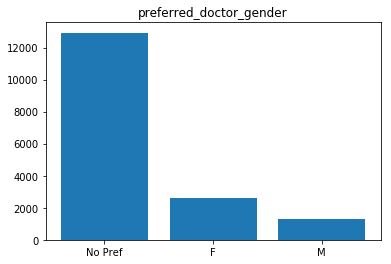

No Pref    12924
F           2582
M           1301
Name: preferred_doctor_gender, dtype: int64

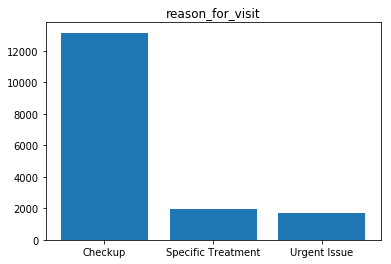

Checkup               13158
Specific Treatment     1950
Urgent Issue           1699
Name: reason_for_visit, dtype: int64

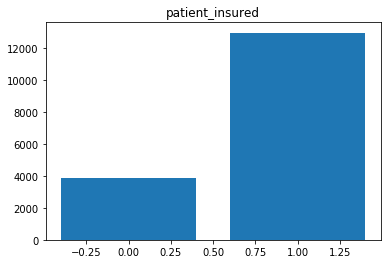

1    12958
0     3849
Name: patient_insured, dtype: int64

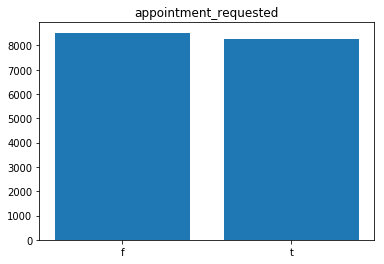

f    8525
t    8282
Name: appointment_requested, dtype: int64

In [111]:
#lets loop through the remaining columns
categorical_columns = ['preferred_doctor_gender', "reason_for_visit", 'patient_insured', 'appointment_requested' ]

for column in categorical_columns:
    plt.figure()
    plt.bar(df[column].value_counts().index, df[column].value_counts().values)
    plt.title(column)
    plt.show()

    display(df[column].value_counts())
    

In [86]:
#for reason_for_visit column, we have 10 NaNs. We will treat them as the most common reason - i.e the mode
df['reason_for_visit'].mode()[0]

'Checkup'

In [87]:
most_common_reason = df['reason_for_visit'].mode()[0]
df['reason_for_visit'].fillna(most_common_reason, inplace=True)

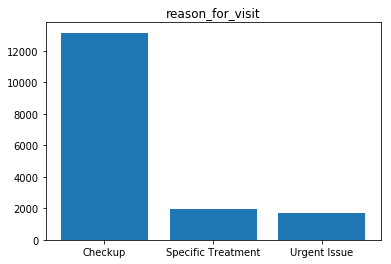

Checkup               13158
Specific Treatment     1950
Urgent Issue           1699
Name: reason_for_visit, dtype: int64

In [89]:
plt.figure()
plt.bar(df['reason_for_visit'].value_counts().index, df['reason_for_visit'].value_counts().values)
plt.title('reason_for_visit')
plt.show()

display(df['reason_for_visit'].value_counts())

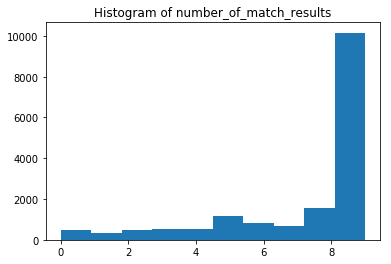

9    10158
8     1577
5     1162
6      824
7      669
3      551
4      547
0      504
2      458
1      357
Name: number_of_match_results, dtype: int64

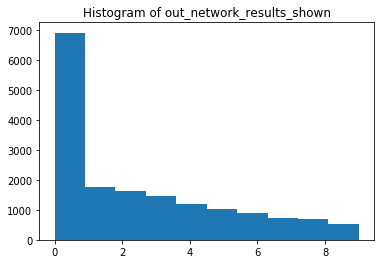

0    6901
1    1770
2    1624
3    1454
4    1209
5    1029
6     885
7     728
8     678
9     529
Name: out_network_results_shown, dtype: int64

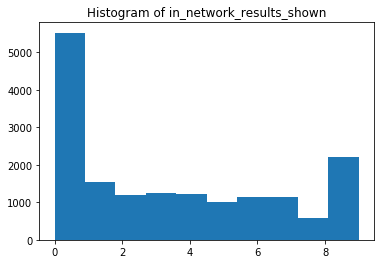

0    5522
9    2202
1    1545
3    1247
4    1226
2    1193
6    1148
7    1134
5    1008
8     582
Name: in_network_results_shown, dtype: int64

C:\Users\Ali\Anaconda3\lib\site-packages\numpy\lib\histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Ali\Anaconda3\lib\site-packages\numpy\lib\histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


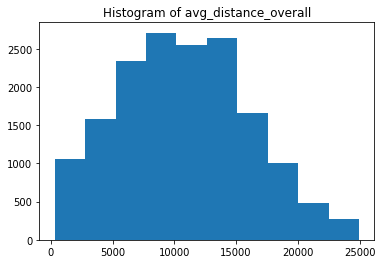

2510.435723     36
1752.618634     31
6744.017210     28
2725.723626     28
6095.111931     27
2079.625122     25
4064.110233     25
3495.725083     24
16204.068480    22
2720.823072     22
5908.863460     20
8788.974546     20
2799.635272     20
7263.521566     18
7248.364073     18
13972.718600    17
4585.580071     17
8897.692293     16
8208.122792     16
1421.658583     15
7359.719802     15
8926.377460     15
9143.706180     15
14992.756410    15
11477.098290    15
8199.904715     14
13475.115510    14
11089.144860    14
7995.341738     14
14828.882330    14
                ..
2065.057960      1
8683.489931      1
11664.938170     1
14217.277230     1
4645.035182      1
14442.620640     1
15674.660760     1
10541.373120     1
12272.885845     1
14607.108090     1
12184.673160     1
19392.688700     1
8692.372538      1
11988.425680     1
11091.750701     1
8747.930874      1
15242.478850     1
12569.518460     1
3744.405881      1
6648.561541      1
2746.430644      1
11920.599780

In [91]:
numerical_cols = ['number_of_match_results', 'out_network_results_shown', 'in_network_results_shown', 'avg_distance_overall']

for column in numerical_cols:
    plt.figure()
    plt.hist(df[column])
    plt.title(f"Histogram of {column}")
    plt.show()

    display(df[column].value_counts())

In [92]:
print(df['avg_distance_overall'].mean())
print(df['avg_distance_overall'].median())

10793.829379743276
10607.31675


In [97]:
#We know we have 500+ NaNs. We will replace these NaNs with the mean avg_distance_overall in the region

region_mean_dist = df.groupby(['region'])['avg_distance_overall'].mean()
display(region_mean_dist)
type(region_mean_dist) #it is a Series

region
Austin           13453.469889
Chicago           9590.677845
Denver           11361.070215
San Diego        13344.366220
San Francisco     7840.323109
San Jose         11518.665641
Seattle          11106.886081
Washington DC     2851.145865
Name: avg_distance_overall, dtype: float64

pandas.core.series.Series

In [101]:
#Lets temporarily set the index in the df to region
df.set_index(['region'], inplace=True)


In [102]:
df.head()

,source,campaign,preferred_doctor_gender,reason_for_visit,patient_insured,number_of_match_results,out_network_results_shown,in_network_results_shown,avg_distance_overall,appointment_requested
region,,,,,,,,,,
San Jose,Facebook,doctor_patient_acquisition,No Pref,Specific Treatment,f,9,0,0,10547.219510,f
San Diego,Facebook,doctor_patient_acquisition,F,Checkup,f,2,0,0,20784.617720,f
Austin,Other,Unknown,No Pref,Checkup,t,9,8,1,8014.945931,t
Denver,Facebook,doctor_patient_acquisition,No Pref,Specific Treatment,t,8,2,6,16651.158750,f
Chicago,Facebook,doctor_patient_acquisition,F,Checkup,f,9,0,0,5216.934559,f


In [103]:
#now set NaNs to mean
df['avg_distance_overall'].fillna(region_mean_dist, inplace=True)
df.isna().sum()

source                       0
campaign                     0
preferred_doctor_gender      0
reason_for_visit             0
patient_insured              0
number_of_match_results      0
out_network_results_shown    0
in_network_results_shown     0
avg_distance_overall         0
appointment_requested        0
dtype: int64

In [104]:
df.reset_index(inplace=True)

In [105]:
df.isna().sum()

region                       0
source                       0
campaign                     0
preferred_doctor_gender      0
reason_for_visit             0
patient_insured              0
number_of_match_results      0
out_network_results_shown    0
in_network_results_shown     0
avg_distance_overall         0
appointment_requested        0
dtype: int64

Now that our data is pretty clean, lets proceed to building our model. 

From previous excersizes, we built our model using continuous independent variables (to predict continuous vars - Linear reg, or categorical var - Logistic Reg). What about when using categorical independent values? Convert them to numeric!

No more NaN values!

# Building our Model

## Model steps:

#1) Define X and Y
#2) Instantiate model
#3) Fit your model
#4) Evaluate


In [ ]:
df['patient_insured'] = df['patient_insured'].replace(to_replace={'f':0, 't':1}) #using the dictionary allows you to do this all at once
df['appointment_requested'] = df['appointment_requested'].replace(to_replace={'f':0, 't':1})

In [113]:
df.head()

,region,source,campaign,preferred_doctor_gender,reason_for_visit,patient_insured,number_of_match_results,out_network_results_shown,in_network_results_shown,avg_distance_overall,appointment_requested
0,San Jose,Facebook,doctor_patient_acquisition,No Pref,Specific Treatment,0,9,0,0,10547.219510,0
1,San Diego,Facebook,doctor_patient_acquisition,F,Checkup,0,2,0,0,20784.617720,0
2,Austin,Other,Unknown,No Pref,Checkup,1,9,8,1,8014.945931,1
3,Denver,Facebook,doctor_patient_acquisition,No Pref,Specific Treatment,1,8,2,6,16651.158750,0
4,Chicago,Facebook,doctor_patient_acquisition,F,Checkup,0,9,0,0,5216.934559,0


We have converted all the categorical columns with binary outcomes to numerical ones uisng 0 and 1. But what about categorical columns with multiple outcomes like region?

In R, we would convert these to 'factors', which in Python is equivalent to a dictionary where the key is the category (factor in R) and the value is the numerical conversion (levels in R).

For example, regions: San Jose, San Diego, Austin, San Jose -- would have factors of: San Jose, San Diego and Austin, with Levels of 0, 1 and 2.

In [127]:
#Define X and Y
X = df.iloc[:, :-1] #every row, all columns except last one
y = df['appointment_requested']
print(X.columns)

#Create dummy variables for categorical data
X = pd.get_dummies(X) #could set drop_first to true to get rid of the redundant dummy vars, but we will keep it false for now sicne regularization takes care of this

#EXCERSIZE - compare above with a version where drop_first=True

Index(['region', 'source', 'campaign', 'preferred_doctor_gender',
       'reason_for_visit', 'patient_insured', 'number_of_match_results',
       'out_network_results_shown', 'in_network_results_shown',
       'avg_distance_overall'],
      dtype='object')


In [122]:
X.head()

,patient_insured,number_of_match_results,out_network_results_shown,in_network_results_shown,avg_distance_overall,region_Austin,region_Chicago,region_Denver,region_San Diego,region_San Francisco,...,campaign_Unknown,campaign_doctor_patient_acquisition,campaign_patient_leads,campaign_search,preferred_doctor_gender_F,preferred_doctor_gender_M,preferred_doctor_gender_No Pref,reason_for_visit_Checkup,reason_for_visit_Specific Treatment,reason_for_visit_Urgent Issue
0,0,9,0,0,10547.219510,0,0,0,0,0,...,0,1,0,0,0,0,1,0,1,0
1,0,2,0,0,20784.617720,0,0,0,1,0,...,0,1,0,0,1,0,0,1,0,0
2,1,9,8,1,8014.945931,1,0,0,0,0,...,1,0,0,0,0,0,1,1,0,0
3,1,8,2,6,16651.158750,0,0,1,0,0,...,0,1,0,0,0,0,1,0,1,0
4,0,9,0,0,5216.934559,0,1,0,0,0,...,0,1,0,0,1,0,0,1,0,0


In [128]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix 

#2 Instantiate the model
logreg = LogisticRegression()

In [129]:
#3 Fit our model
logreg.fit(X,y)

C:\Users\Ali\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [130]:
#4 Evaluate our model
print(f"Accuracy score: ", {logreg.score(X,y)})

Accuracy score:  {0.6028440530731243}


In [134]:
#lets see our predictions
y_pred = logreg.predict(X)
y_pred

array([0, 0, 0, ..., 1, 0, 1], dtype=int64)

Lets look at our confusion matrix - which essentially shows our Type1 and Type2 errors
Output:

Actual (Vertical) vs Predicted (Horizontal). Type1 (False Pos- rejected null when shouldnt), Type2 (False Neg)

          0                   1
    0 True Negative      False Positive
    1 False Negative      True Positive

In [147]:
print('Confusion matrix: \n', confusion_matrix(y, y_pred))


Confusion matrix: 
 [[5271 3254]
 [3421 4861]]


In [142]:
#lets see coefficients
results_df = pd.DataFrame({'feature': X.columns, 'coefficient':logreg.coef_[0]})
results_df.sort_values(by = 'coefficient', inplace = True)
results_df

,feature,coefficient
22,campaign_search,-0.473401
17,source_adwords,-0.375525
14,source_Facebook,-0.333356
15,source_Other,-0.320295
27,reason_for_visit_Specific Treatment,-0.254429
13,source_Direct,-0.238211
19,campaign_Unknown,-0.237269
10,region_San Jose,-0.218078
6,region_Chicago,-0.117512
24,preferred_doctor_gender_M,-0.111466


Now lets try to regularize at different weight. We will adjust the C value from the dafult of 1.0. C value is a measure of how much we penalize our coefficients (lower the value, harder we penalize)

USING L2


For C value:  {1e-05}
Accuracy score:  {0.5744630213601476}
Confusion matrix: 
 [[5209 3316]
 [3836 4446]]

For C value:  {0.0001}
Accuracy score:  {0.5866603201047182}
Confusion matrix: 
 [[4815 3710]
 [3237 5045]]

For C value:  {0.001}
Accuracy score:  {0.600345094305944}
Confusion matrix: 
 [[4971 3554]
 [3163 5119]]

For C value:  {0.01}
Accuracy score:  {0.6018920687808651}
Confusion matrix: 
 [[5065 3460]
 [3231 5051]]

For C value:  {0.1}
Accuracy score:  {0.6032605462009877}
Confusion matrix: 
 [[5282 3243]
 [3425 4857]]

For C value:  {1}
Accuracy score:  {0.6028440530731243}
Confusion matrix: 
 [[5271 3254]
 [3421 4861]]

For C value:  {10}
Accuracy score:  {0.6022490628904623}
Confusion matrix: 
 [[5285 3240]
 [3445 4837]]

For C value:  {100}
Accuracy score:  {0.6040340334384483}
Confusion matrix: 
 [[5246 3279]
 [3376 4906]]

For C value:  {1000}
Accuracy score:  {0.6030820491461891}
Confusion matrix: 
 [[5196 3329]
 [3342 4940]]

For C value:  {10000}
Accuracy score:  {

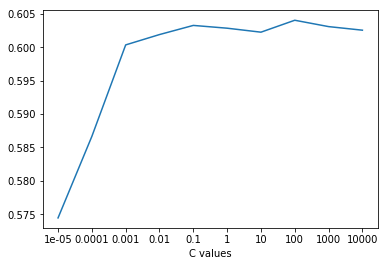

In [152]:
import warnings
warnings.filterwarnings('ignore')  #this is to ignore the warnings about the solver from repeatedly being printed



#Lets penalize across the following C values
c_values = [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]

#placeholder for accuracy score
acc_scores = []

for val in c_values:
    logreg = LogisticRegression(C=val)
    logreg.fit(X, y)
    y_pred = logreg.predict(X)
    
    a = logreg.score(X, y)
    acc_scores.append(a)
    
    print(f"\nFor C value: ", {val})
    print(f"Accuracy score: ", {a})
    print('Confusion matrix: \n', confusion_matrix(y, y_pred))
    
plt.figure()
plt.plot(acc_scores)
plt.xticks(range(len(c_values)), labels=c_values)
plt.xlabel('C values')
plt.show() 


For C value:  {1e-05}
Accuracy score:  {0.5072291307193432}
Confusion matrix: 
 [[8525    0]
 [8282    0]]

For C value:  {0.0001}
Accuracy score:  {0.5072291307193432}
Confusion matrix: 
 [[8525    0]
 [8282    0]]

For C value:  {0.001}
Accuracy score:  {0.5787469506753139}
Confusion matrix: 
 [[4944 3581]
 [3499 4783]]

For C value:  {0.01}
Accuracy score:  {0.6004640923424763}
Confusion matrix: 
 [[5114 3411]
 [3304 4978]]

For C value:  {0.1}
Accuracy score:  {0.6009995835068721}
Confusion matrix: 
 [[5267 3258]
 [3448 4834]]

For C value:  {1}
Accuracy score:  {0.6040340334384483}
Confusion matrix: 
 [[5310 3215]
 [3440 4842]]

For C value:  {10}
Accuracy score:  {0.6039150354019158}
Confusion matrix: 
 [[5238 3287]
 [3370 4912]]

For C value:  {100}
Accuracy score:  {0.6040935324567145}
Confusion matrix: 
 [[5241 3284]
 [3370 4912]]

For C value:  {1000}
Accuracy score:  {0.6040340334384483}
Confusion matrix: 
 [[5240 3285]
 [3370 4912]]

For C value:  {10000}
Accuracy score:  

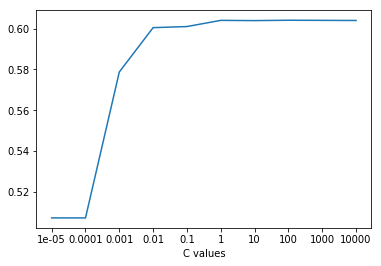

In [153]:
import warnings
warnings.filterwarnings('ignore')  #this is to ignore the warnings about the solver from repeatedly being printed



#Lets penalize across the following C values
c_values = [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]

#placeholder for accuracy score
acc_scores = []

for val in c_values:
    logreg = LogisticRegression(C=val, penalty='l1', solver='liblinear')
    logreg.fit(X, y)
    y_pred = logreg.predict(X)
    
    a = logreg.score(X, y)
    acc_scores.append(a)
    
    print(f"\nFor C value: ", {val})
    print(f"Accuracy score: ", {a})
    print('Confusion matrix: \n', confusion_matrix(y, y_pred))
    
plt.figure()
plt.plot(acc_scores)
plt.xticks(range(len(c_values)), labels=c_values)
plt.xlabel('C values')
plt.show() 

In [158]:
#We see from aboe that these are best

#Creat the model
logreg2 = LogisticRegression(C=100, penalty='l1')
logreg2.fit(X,y)

#Create a ddataframe to exame coefficiens learned
results_df2 = pd.DataFrame({'feature': X.columns,
                           'coefficient': logreg2.coef_[0]})
#results_df2['___-to-1 odds of being Class 1'] = np.exp(logreg2.coef_[0])

results_df2.sort_values(by = 'coefficient', inplace=True)
results_df2



,feature,coefficient
12,region_Washington DC,-7.570761
22,campaign_search,-0.841795
27,reason_for_visit_Specific Treatment,-0.447074
10,region_San Jose,-0.375087
19,campaign_Unknown,-0.334334
6,region_Chicago,-0.320974
9,region_San Francisco,-0.258822
11,region_Seattle,-0.226796
26,reason_for_visit_Checkup,-0.213192
28,reason_for_visit_Urgent Issue,-0.193659


From this we can see that encouraging patient lead campaigns, users whose Source is patients and insured individuals increase the likelyhood of requesting appointments. 

Denver seems to be a successful market. If the current goal is revenue, focus on Denver. If focus is on nation-wide growth, reorient to other regions.

Conversely, Users from search campaigns and facebook campaigns had a lower likelyhood of requesting appointments. Recommendation would be to adjust campaign budgets to focus on other campaigns.

Number of match results also increases the likelyhood of users requesting appointments.